# Imports

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import torchvision
from tqdm import tqdm_notebook as tqdm

# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

from visualization.plots_v2 import scrollable_loss_vs_hist, initial_vs_final_overlap

from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
import seaborn as sns

In [2]:
from pathlib import Path
import re

# Accuracy Comparison

In [3]:
np.set_printoptions(precision=2)

parent_dir = '/home/manu/Projects/dev/weightSymmetry/demolog/1 hidden layer/40 neurons'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    acc = []
    test_acc = []
    for f_name in os.listdir(method_dir):
        if os.path.isdir(os.path.join(method_dir, f_name)):
            # skip directories
            continue
        elif f_name.startswith('acc'):
            acc.append(np.load(os.path.join(method_dir, f_name))[-235:])
        elif f_name.startswith('test_accuracy'):
            test_acc.append(np.load(os.path.join(method_dir, f_name))[-1:])
        elif f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name))[-234:])

    acc = np.array(acc)
    losses = np.array(losses)
    print(method + ' ' + str(np.mean(acc)) + ' ' + str(test_acc[0][0]))

smart_init_noise_0.5 76.58078457446808 78.55
smart_init_ortho_reg_rotation_noise_0.64 90.72140957446808 92.11
smart_init_ortho_reg_simple_0.5 83.25797872340425 84.06
smart_init_rotation_noise_0.64 83.56881648936171 84.1
smart_init_simple_0.5 83.70179521276596 84.21
teacher_4_epochs 82.58976063829788 83.55
train_from_scratch 92.40359042553192 92.75999999999999


# Histogram Plots

In [4]:
%matplotlib qt

In [5]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/demolog/1 hidden layer/40 neurons/train_from_scratch/'
run_num = 0
ylim = 200
steps = 20

scrollable_loss_vs_hist(parent_dir, run_num, steps=steps, net2net=False)

In [6]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/demolog/1 hidden layer/40 neurons/smart_init_simple_0.5/'
run_num = 0
ylim = 200
steps = 20

scrollable_loss_vs_hist(parent_dir, run_num, steps=steps, net2net=True)

# Initial vs Final Overlap

In [11]:
%matplotlib inline

(-0.5, 0.5)

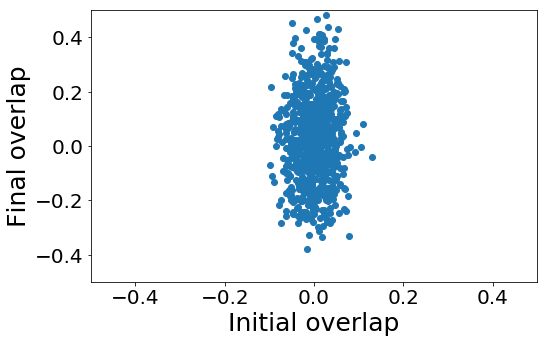

In [15]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/demolog/1 hidden layer/40 neurons/train_from_scratch/'
run_num = 0

initial_vs_final_overlap(parent_dir, run_num)
plt.xlim([-0.5,0.5])
plt.ylim([-0.5,0.5])

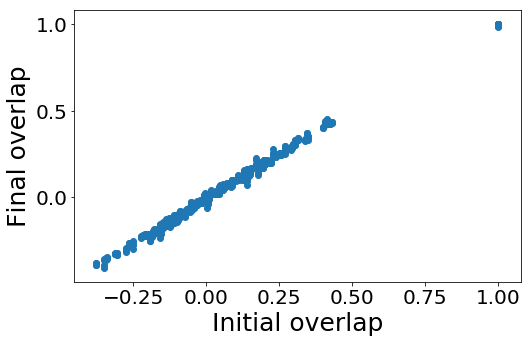

In [17]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/demolog/1 hidden layer/40 neurons/smart_init_simple_0.5/'
run_num = 0

initial_vs_final_overlap(parent_dir, run_num)
# plt.xlim([-0.5,0.5])
# plt.ylim([-0.5,0.5])

# MSD Plots

In [53]:
def MSD_plot(parent_dir, run_num, max_time_lag, start_batch=0, end_batch=-1):
    
    cd_ranked = np.load(os.path.join(parent_dir, 'cosine_dists_diff_' + str(run_num) + '.npy'))[start_batch:end_batch]
    
    msd_low = np.zeros(max_time_lag)
    msd_high = np.zeros(max_time_lag)
    se_low = np.zeros(max_time_lag)
    se_high = np.zeros(max_time_lag)

    for i in range(1,max_time_lag):
        sq_diff = ((cd_ranked[i:] - cd_ranked[:-i])**2).mean(axis=0)

        n_pairs = len(sq_diff)//2
        msd_low[i] = np.mean(sq_diff[:n_pairs])
        se_low[i] = np.std(sq_diff[:n_pairs])/(np.sqrt(n_pairs))
        msd_high[i] = np.mean(sq_diff[n_pairs:])
        se_high[i] = np.std(sq_diff[n_pairs:])/(np.sqrt(n_pairs))
    
    plt.figure(figsize=(8,5))

    plt.plot(np.arange(max_time_lag), msd_low, label='low_overlap_pairs', linewidth=3)
    plt.fill_between(np.arange(max_time_lag), msd_low-se_low, msd_low+se_low, alpha=0.25)

    plt.plot(np.arange(max_time_lag), msd_high, label='high_overlap_pairs', linewidth=3)
    plt.fill_between(np.arange(max_time_lag), msd_high-se_high, msd_high+se_high, alpha=0.25)

    plt.title('Mean MSD')
    plt.xlabel('Time Lag', fontsize=25)
    plt.ylabel('Mean MSD', fontsize=25)
    plt.tick_params(labelsize=20)
    plt.legend(fontsize=20)

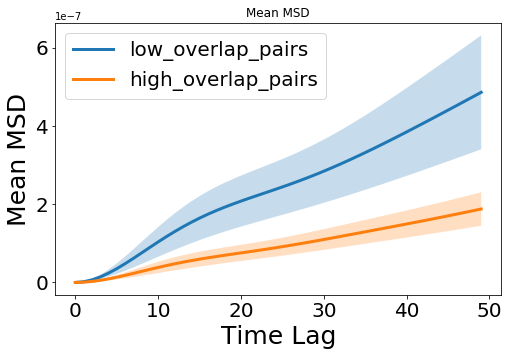

In [56]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/demolog/2 hidden layers/500 neurons/train_from_scratch/'
run_num = 0
max_time_lag = 50

MSD_plot(parent_dir, run_num, max_time_lag)